#### Import of Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [2]:
df1 = pd.read_csv('datasets/letter/letterRecognition.csv')
df = df1.head(n=500)


In [3]:
df.head(25)

letter  x-box-pos  y-box-pos  width  height  onpix  x-bar  y-bar  x2bar  \
0       T          2          8      3       5      1      8     13      0   
1       I          5         12      3       7      2     10      5      5   
2       D          4         11      6       8      6     10      6      2   
3       N          7         11      6       6      3      5      9      4   
4       G          2          1      3       1      1      8      6      6   
5       S          4         11      5       8      3      8      8      6   
6       B          4          2      5       4      4      8      7      6   
7       A          1          1      3       2      1      8      2      2   
8       J          2          2      4       4      2     10      6      2   
9       M         11         15     13       9      7     13      2      6   
10      X          3          9      5       7      4      8      7      3   
11      O          6         13      4       7      4      6      7      6   
12      G          4          9      6       7      6      7      8      6   
13      M          6          9      8       6      9      7      8      6   
14      R          5          9      5       7      6      6     11      7   
15      F          6          9      5       4      3     10      6      3   
16      O          3          4      4       3      2      8      7      7   
17      C          7         10      5       5      2      6      8      6   
18      T          6         11      6       8      5      6     11      5   
19      J          2          2      3       3      1     10      6      3   
20      J          1          3      2       2      1      8      8      2   
21      H          4          5      5       4      4      7      7      6   
22      S          3          2      3       3      2      8      8      7   
23      O          6         11      7       8      5      7      6      9   
24      J          3          6      4       4      2      6      6      4   

    y2bar  xybar  x2ybr  xy2bar  x-ege  xegvy  y-ege  yegvx  
0       6      6     10       8      0      8      0      8  
1       4     13      3       9      2      8      4     10  
2       6     10      3       7      3      7      3      9  
3       6      4      4      10      6     10      2      8  
4       6      6      5       9      1      7      5     10  
5       9      5      6       6      0      8      9      7  
6       6      7      6       6      2      8      7     10  
7       2      8      2       8      1      6      2      7  
8       6     12      4       8      1      6      1      7  
9       2     12      1       9      8      1      1      8  
10      8      5      6       8      2      8      6      7  
11      3     10      7       9      5      9      5      8  
12      2      6      5      11      4      8      7      8  
13      5      7      5       8      8      9      8      6  
14      3      7      3       9      2      7      5     11  
15      5     10      5       7      3      9      6      9  
16      5      7      6       8      2      8      3      8  
17      8     11      7      11      2      8      5      9  
18      6     11      9       4      3     12      2      4  
19      6     12      4       9      0      7      1      7  
20      5     14      5       8      0      7      0      7  
21      6      7      6       8      3      8      3      8  
22      5      7      5       7      2      8      9      8  
23      6      7      5       9      4      8      5      5  
24      4     14      8      12      1      6      1      6

In [4]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   letter     500 non-null    object
 1   x-box-pos  500 non-null    int64 
 2   y-box-pos  500 non-null    int64 
 3   width      500 non-null    int64 
 4   height     500 non-null    int64 
 5   onpix      500 non-null    int64 
 6   x-bar      500 non-null    int64 
 7   y-bar      500 non-null    int64 
 8   x2bar      500 non-null    int64 
 9   y2bar      500 non-null    int64 
 10  xybar      500 non-null    int64 
 11  x2ybr      500 non-null    int64 
 12  xy2bar     500 non-null    int64 
 13  x-ege      500 non-null    int64 
 14  xegvy      500 non-null    int64 
 15  y-ege      500 non-null    int64 
 16  yegvx      500 non-null    int64 
dtypes: int64(16), object(1)
memory usage: 66.5+ KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

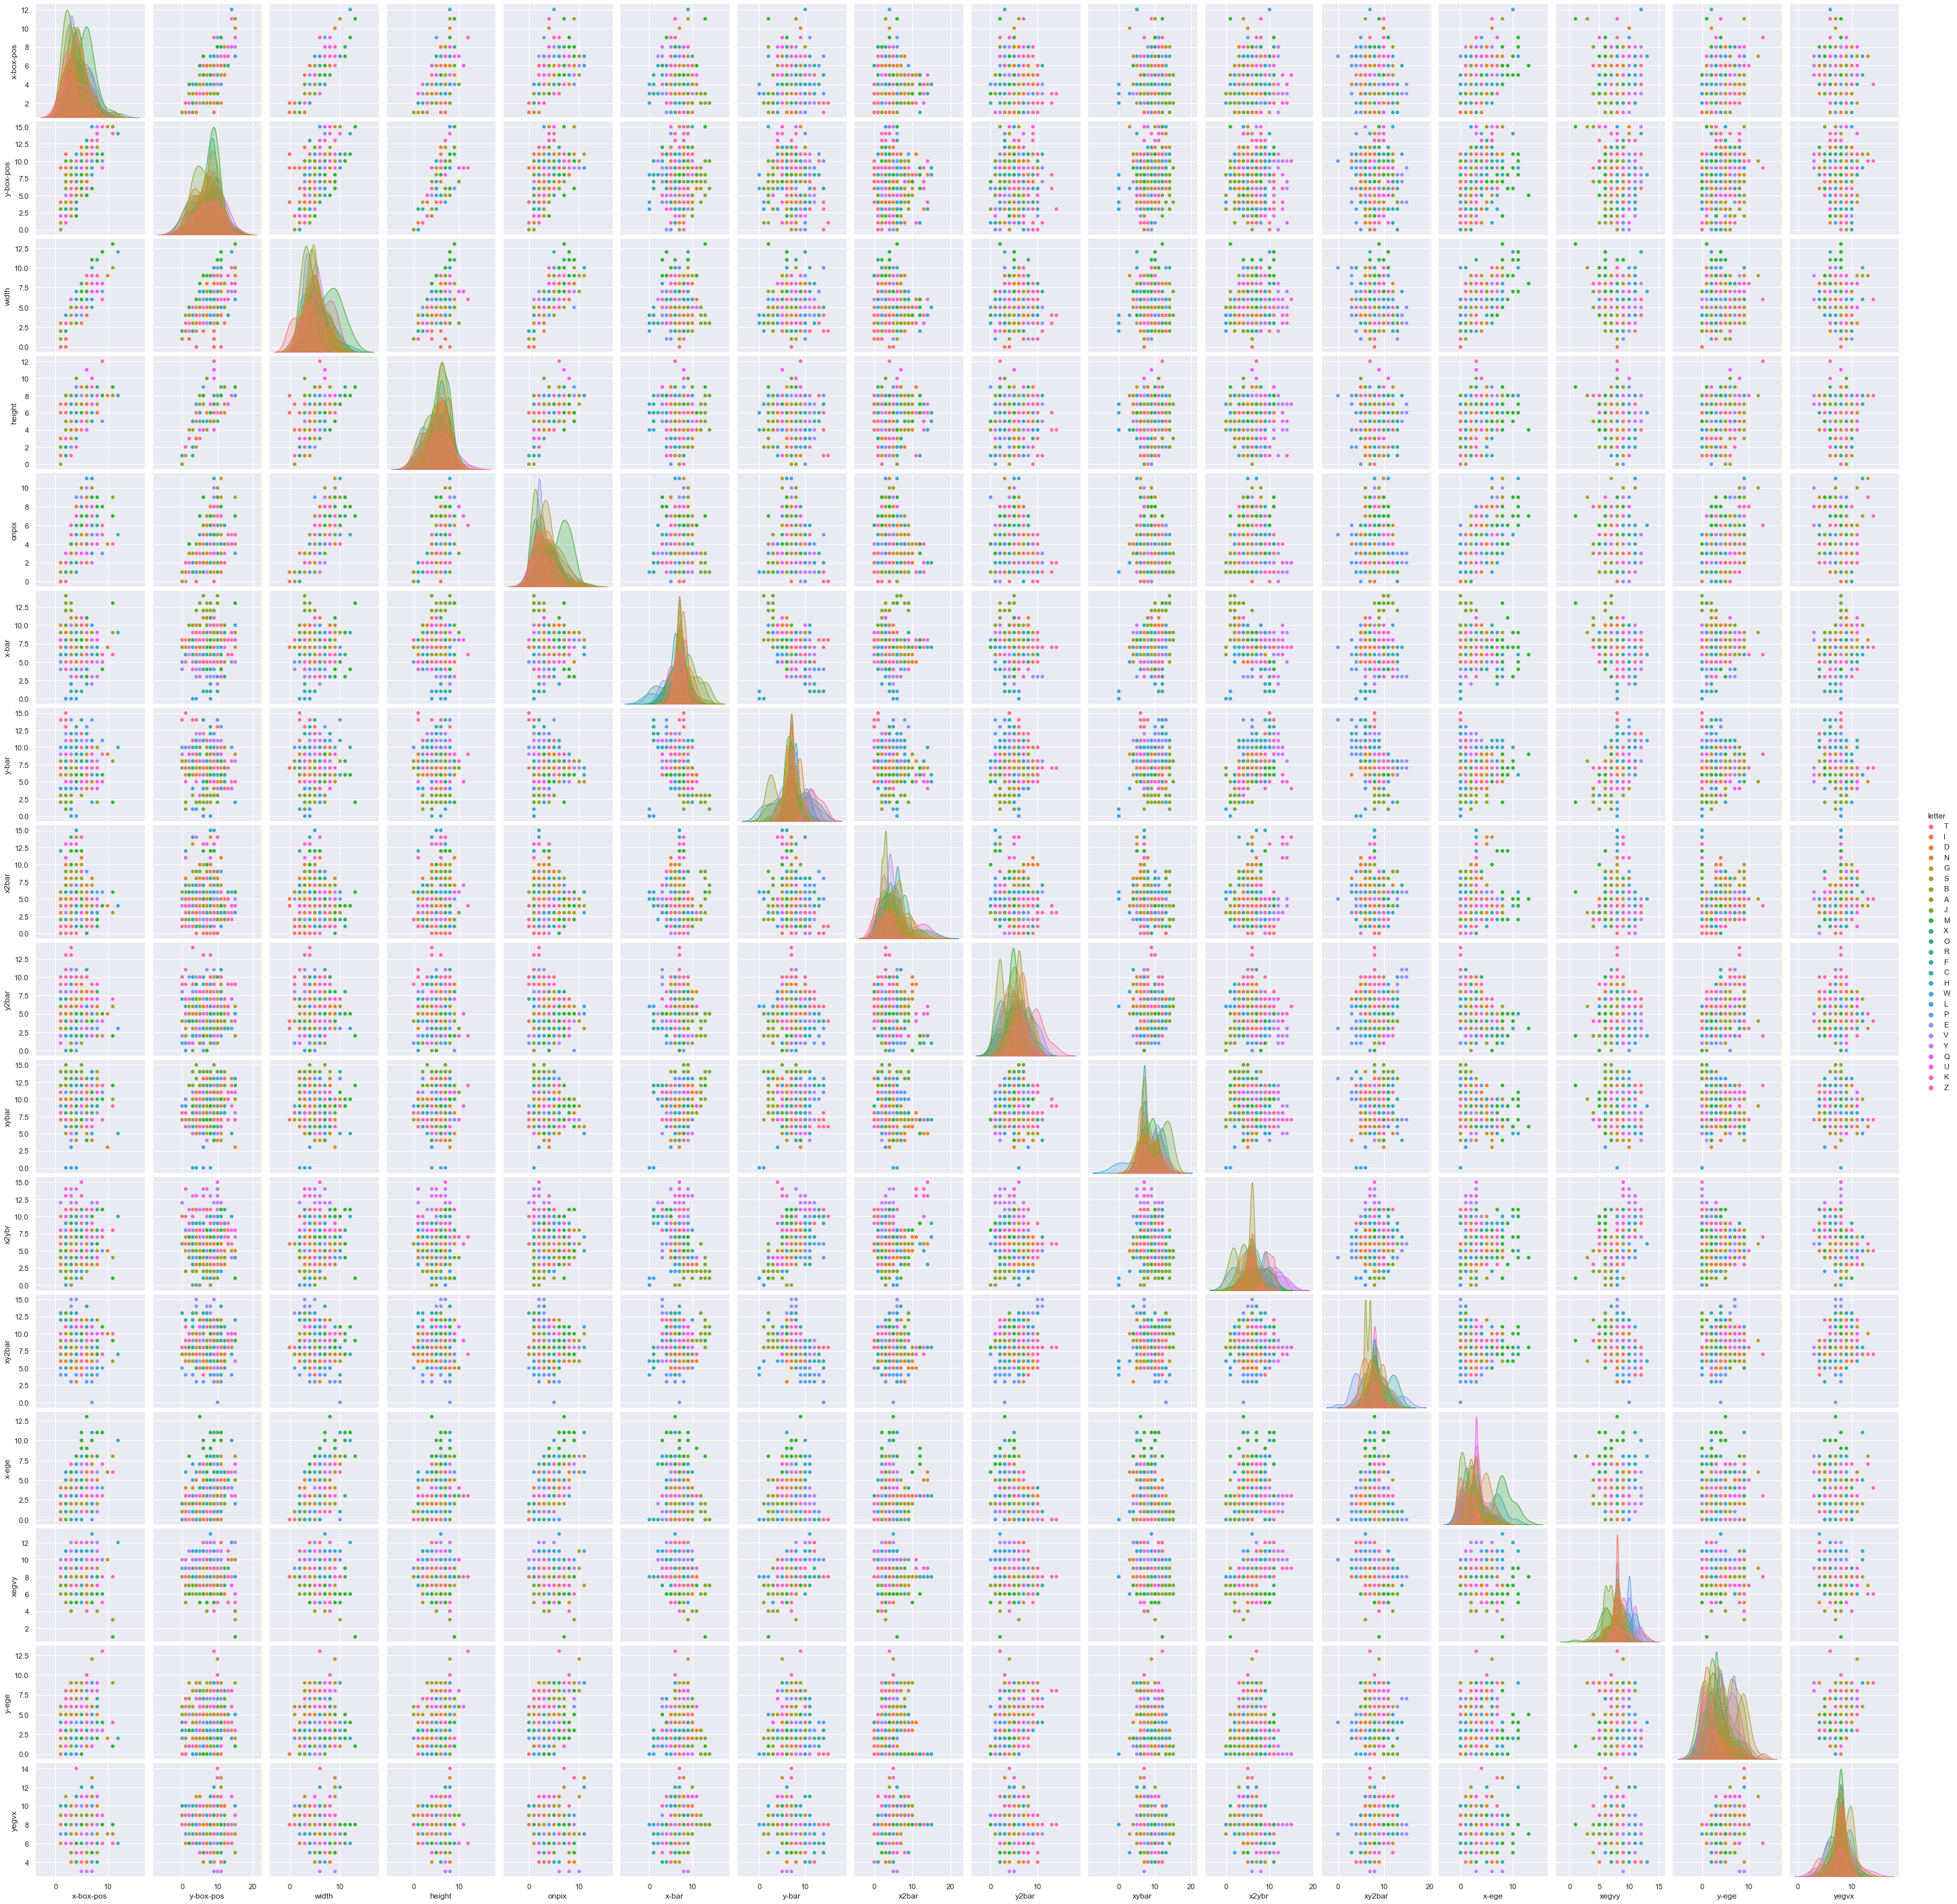

In [5]:
sns.pairplot(df, hue='letter')
plt.show()

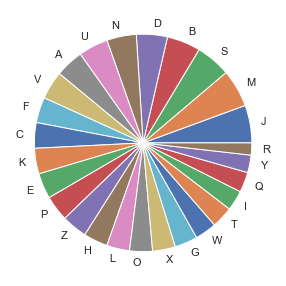

In [6]:
y =df['letter']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [7]:
X = df.drop(columns=['letter'])
X.head(25)
X.describe().transpose()

count   mean       std  min  25%  50%   75%   max
x-box-pos  500.0  4.124  1.960692  1.0  3.0  4.0   5.0  12.0
y-box-pos  500.0  7.192  3.288276  0.0  5.0  8.0   9.0  15.0
width      500.0  5.200  2.133801  0.0  4.0  5.0   6.0  13.0
height     500.0  5.402  2.155386  0.0  4.0  6.0   7.0  12.0
onpix      500.0  3.482  2.175118  0.0  2.0  3.0   5.0  11.0
x-bar      500.0  7.012  2.128124  0.0  6.0  7.0   8.0  14.0
y-bar      500.0  7.322  2.378578  0.0  6.0  7.0   8.0  15.0
x2bar      500.0  4.688  2.734522  0.0  3.0  4.0   6.0  15.0
y2bar      500.0  5.316  2.370524  0.0  4.0  5.0   7.0  14.0
xybar      500.0  8.378  2.474543  0.0  7.0  8.0  10.0  15.0
x2ybr      500.0  6.400  2.734768  0.0  5.0  6.0   8.0  15.0
xy2bar     500.0  8.020  2.052322  0.0  7.0  8.0   9.0  15.0
x-ege      500.0  3.008  2.401556  0.0  1.0  3.0   4.0  13.0
xegvy      500.0  8.184  1.565582  1.0  7.0  8.0   9.0  13.0
y-ege      500.0  3.794  2.688125  0.0  2.0  3.0   6.0  13.0
yegvx      500.0  7.846  1.518848  3.0  7.0  8.0   8.0  14.0

#### Standardize the Data

In [8]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

count          mean       std       min       25%       50%  \
x-box-pos  500.0  1.421085e-16  1.001002 -1.594911 -0.573841 -0.063306   
y-box-pos  500.0 -5.684342e-17  1.001002 -2.189355 -0.667278  0.245968   
width      500.0 -9.414691e-17  1.001002 -2.439407 -0.562940 -0.093823   
height     500.0 -8.171241e-17  1.001002 -2.508790 -0.651115  0.277722   
onpix      500.0 -1.101341e-16  1.001002 -1.602436 -0.682025 -0.221819   
x-bar      500.0  2.016165e-16  1.001002 -3.298220 -0.476012 -0.005644   
y-bar      500.0  3.907985e-17  1.001002 -3.081393 -0.556351 -0.135511   
x2bar      500.0  1.012523e-16  1.001002 -1.716093 -0.617911 -0.251850   
y2bar      500.0  7.283063e-17  1.001002 -2.244788 -0.555708 -0.133437   
xybar      500.0 -6.572520e-17  1.001002 -3.389067 -0.557428 -0.152908   
x2ybr      500.0 -1.296740e-16  1.001002 -2.342579 -0.512439 -0.146411   
xy2bar     500.0  2.131628e-16  1.001002 -3.911683 -0.497496 -0.009755   
x-ege      500.0  1.065814e-17  1.001002 -1.253776 -0.836962 -0.003335   
xegvy      500.0  4.796163e-16  1.001002 -4.593305 -0.757026 -0.117646   
y-ege      500.0 -6.039613e-17  1.001002 -1.412806 -0.668048 -0.295669   
yegvx      500.0 -7.105427e-17  1.001002 -3.193772 -0.557559  0.101494   

                75%       max  
x-box-pos  0.447229  4.020972  
y-box-pos  0.550383  2.376874  
width      0.375293  3.659110  
height     0.742141  3.064235  
onpix      0.698592  3.459826  
x-bar      0.464724  3.286931  
y-bar      0.285330  3.231212  
x2bar      0.480272  3.774820  
y2bar      0.711103  3.666994  
xybar      0.656131  2.678730  
x2ybr      0.585645  3.147840  
xy2bar     0.477986  3.404433  
x-ege      0.413479  4.164803  
xegvy      0.521734  3.079254  
y-ege      0.821468  3.428122  
yegvx      0.101494  4.055814

#### Observations and Variables

In [9]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

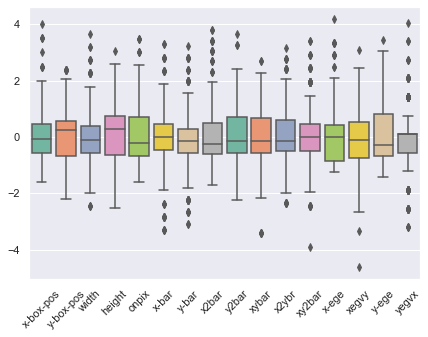

In [10]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

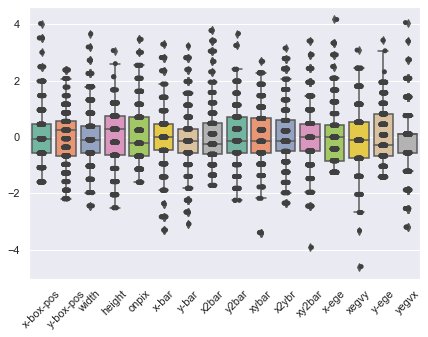

In [11]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

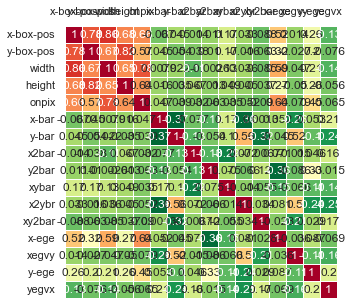

In [12]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [13]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [16] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [16] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [14]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -2.064872 -1.800835 -0.978172  0.222547 -0.158416 -0.102683 -0.931582   
1    0.277757  2.070424 -0.965095  1.130879  0.066153 -2.254611 -1.083497   
2    1.596433  1.762685 -1.129048  1.052034  0.673334 -0.418972 -0.366346   
3    1.349106 -0.768281  0.961461 -0.773439 -0.762712  0.418943 -0.112627   
4   -3.244756  1.813265  0.820764 -0.713251  0.402570  0.564896 -0.491797   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.163344  1.029893  0.950532 -2.155312  0.964778 -0.754015  0.098515   
496 -3.068591  0.369397  0.433638  0.737424  0.292551  0.185020 -0.041248   
497  5.271464 -0.401397  0.839162  0.057329 -2.858836  1.362767 -0.442316   
498 -2.729877  0.077206 -0.005436  0.568145 -0.308210 -1.421025  0.482046   
499  4.830675  0.693157  2.969064 -1.560466  1.279183  1.349036 -2.346207   

          PC8       PC9      PC10      PC11      PC12  
0    1.579475  0.010915  0.325511  2.381895  0.819713  
1    0.087269 -0.097618  0.416922 -0.984158  0.074801  
2    0.821394 -0.022219 -0.063233  0.651438 -0.478902  
3    1.724523 -0.424024 -0.957966 -0.821084  1.759127  
4   -0.495720 -0.330117 -0.445303  0.206222  0.397383  
..        ...       ...       ...       ...       ...  
495 -1.066368  0.398270  0.435258  0.070913  0.007059  
496 -0.861344  0.068253  0.041375 -0.392648  0.191620  
497 -1.317558 -1.448585 -0.752572  0.383445 -0.671203  
498  1.769889  0.109133  0.813831  0.451479 -0.249100  
499  0.085164 -0.652954 -1.207062 -1.182131 -0.886201  

[500 rows x 12 columns]

Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'12 Principal Components explain [97.57%] of the variance'}, xlabel='PC1 (27.0% expl.var)', ylabel='PC2 (16.1% expl.var)'>)

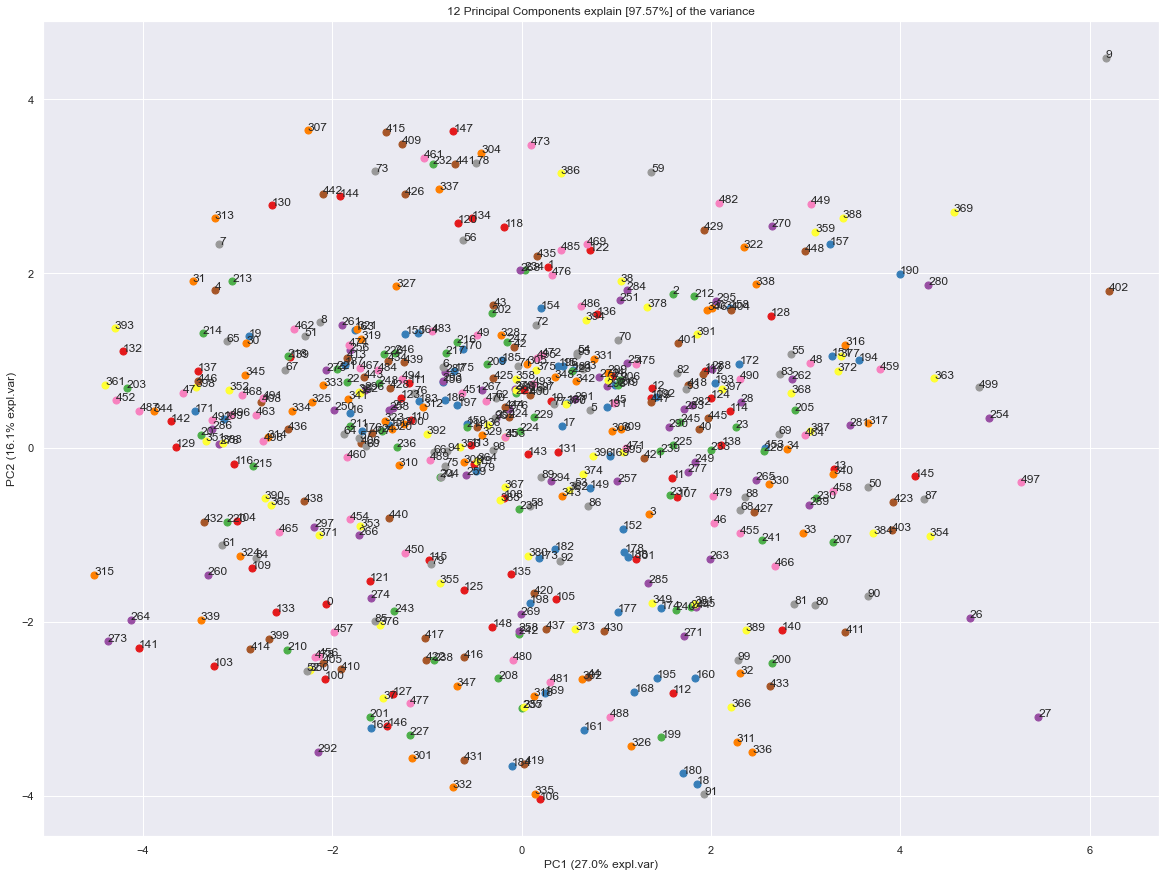

In [15]:
model.scatter(label=True, legend=False)

Eigenvectors

In [16]:
A = out['loadings'].T

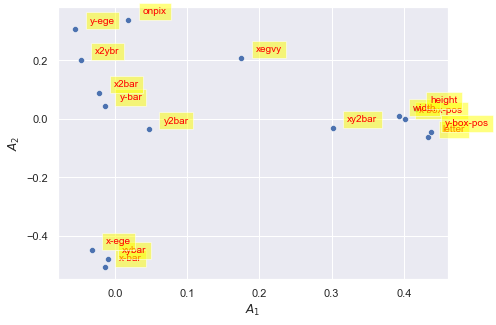

In [17]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

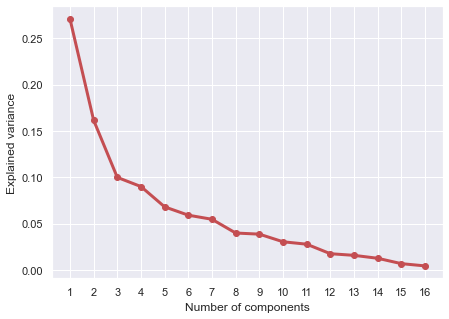

In [18]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

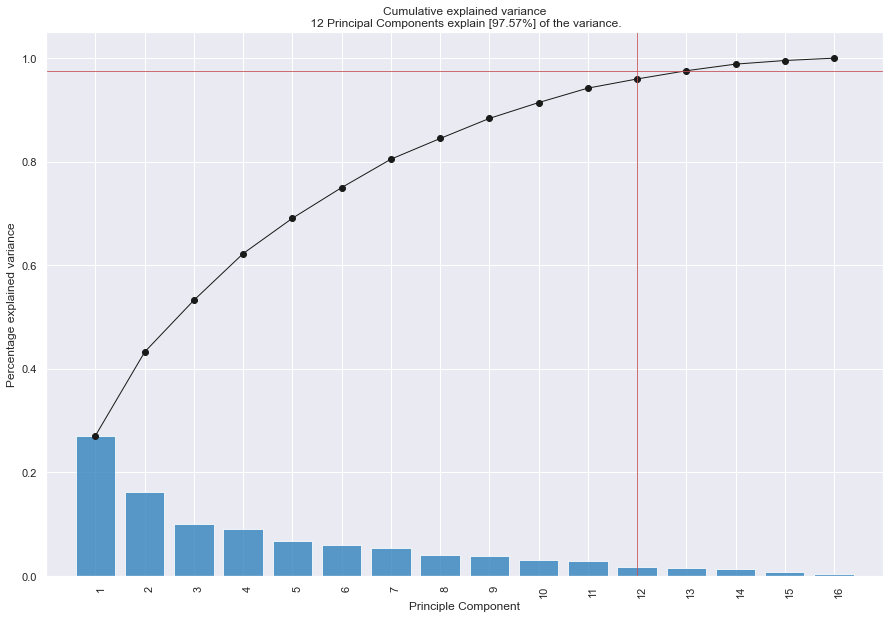

<Figure size 504x360 with 0 Axes>

In [19]:
model.plot();